# Results Explorer for lorenz models

includes plotting the sindy coefficients $\Xi$, loss metrics and trajectories for different initial conditions 

### Choose Model

In [11]:
#CHOOSE MODEL
model_path = "checkpoints/kathleenReplica_1"
#CHOOSE MODEL

In [12]:
import sys
sys.path.append('../')
from trainer import SINDy_trainer
import jax.numpy as jnp
import numpy as np

#exmp input needs to have 128 as second dimension
exmp_input = jnp.ones((1, 128))
trainer = SINDy_trainer.load_from_checkpoint(model_path, exmp_input)

xi_raw = trainer.state.params['sindy_coefficients']
mask = trainer.state.mask
library_hparams = trainer.library_hparams

xi = xi_raw * mask
#making xi numpy array just to support assignment dont want to use .at[idx].set(val) method
xi = np.array(xi)


In [13]:
print(xi)

[[-7.3437315e-01  6.6185279e+00 -4.4485402e+00]
 [-8.1447182e+00  8.0462523e+00  9.6050453e+00]
 [-2.7453196e+00 -1.7508341e+00  1.5973577e+00]
 [-3.2925982e+00  7.9352158e-01 -4.1578911e-02]
 [-9.0694323e-02 -8.4639229e-02 -2.1695767e-02]
 [ 8.7291151e-02 -6.9673702e-02  3.4375444e-01]
 [ 8.5660890e-02  8.5225031e-02 -6.6879444e-02]
 [ 7.8144532e-01  2.5514569e+00 -1.3608674e+00]
 [ 8.9881703e-02  4.0017448e-02  8.3173007e-02]
 [-7.2599900e-01 -3.0022374e-01 -8.0008373e-02]
 [-2.4048476e+00 -3.1820881e+00 -1.6589717e+00]
 [-3.6375161e-02  6.6818289e-02  3.9813709e-02]
 [ 1.6362357e+00  1.7759645e+00  2.1525722e+00]
 [-1.4582894e-02 -8.4102161e-02 -1.5695494e-01]
 [-1.0423976e-02 -3.9404053e-02 -7.8078821e-02]
 [ 1.6186428e+00  3.8026929e-01  2.1501286e+00]
 [ 1.0366399e-02  6.9361605e-02 -9.7699642e-02]
 [-8.0088377e-02 -1.6665772e+00  2.0576844e+00]
 [-8.4508024e-02 -9.8404437e-02 -7.9318825e-03]
 [-1.7398709e+00 -2.5741317e+00 -5.0428804e-02]]


# plot $\Xi$

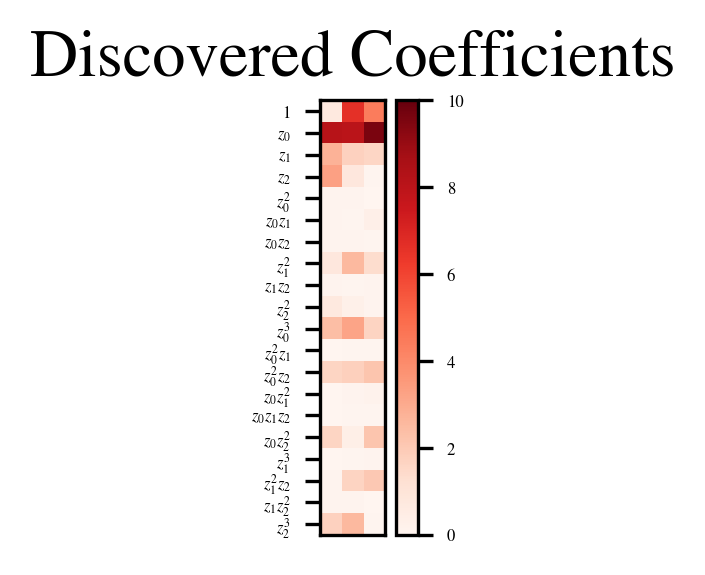

In [14]:
# sys.path.append('../plot_utils')
import matplotlib.pyplot as plt
from plot_utils.plot_xi import plot_sindy_coefficients
import plot_utils

plt.style.use("../plot_utils/plot_settings.mplstyle")
plot_sindy_coefficients(xi, library_hparams = library_hparams, save_path="xi_plot.png")

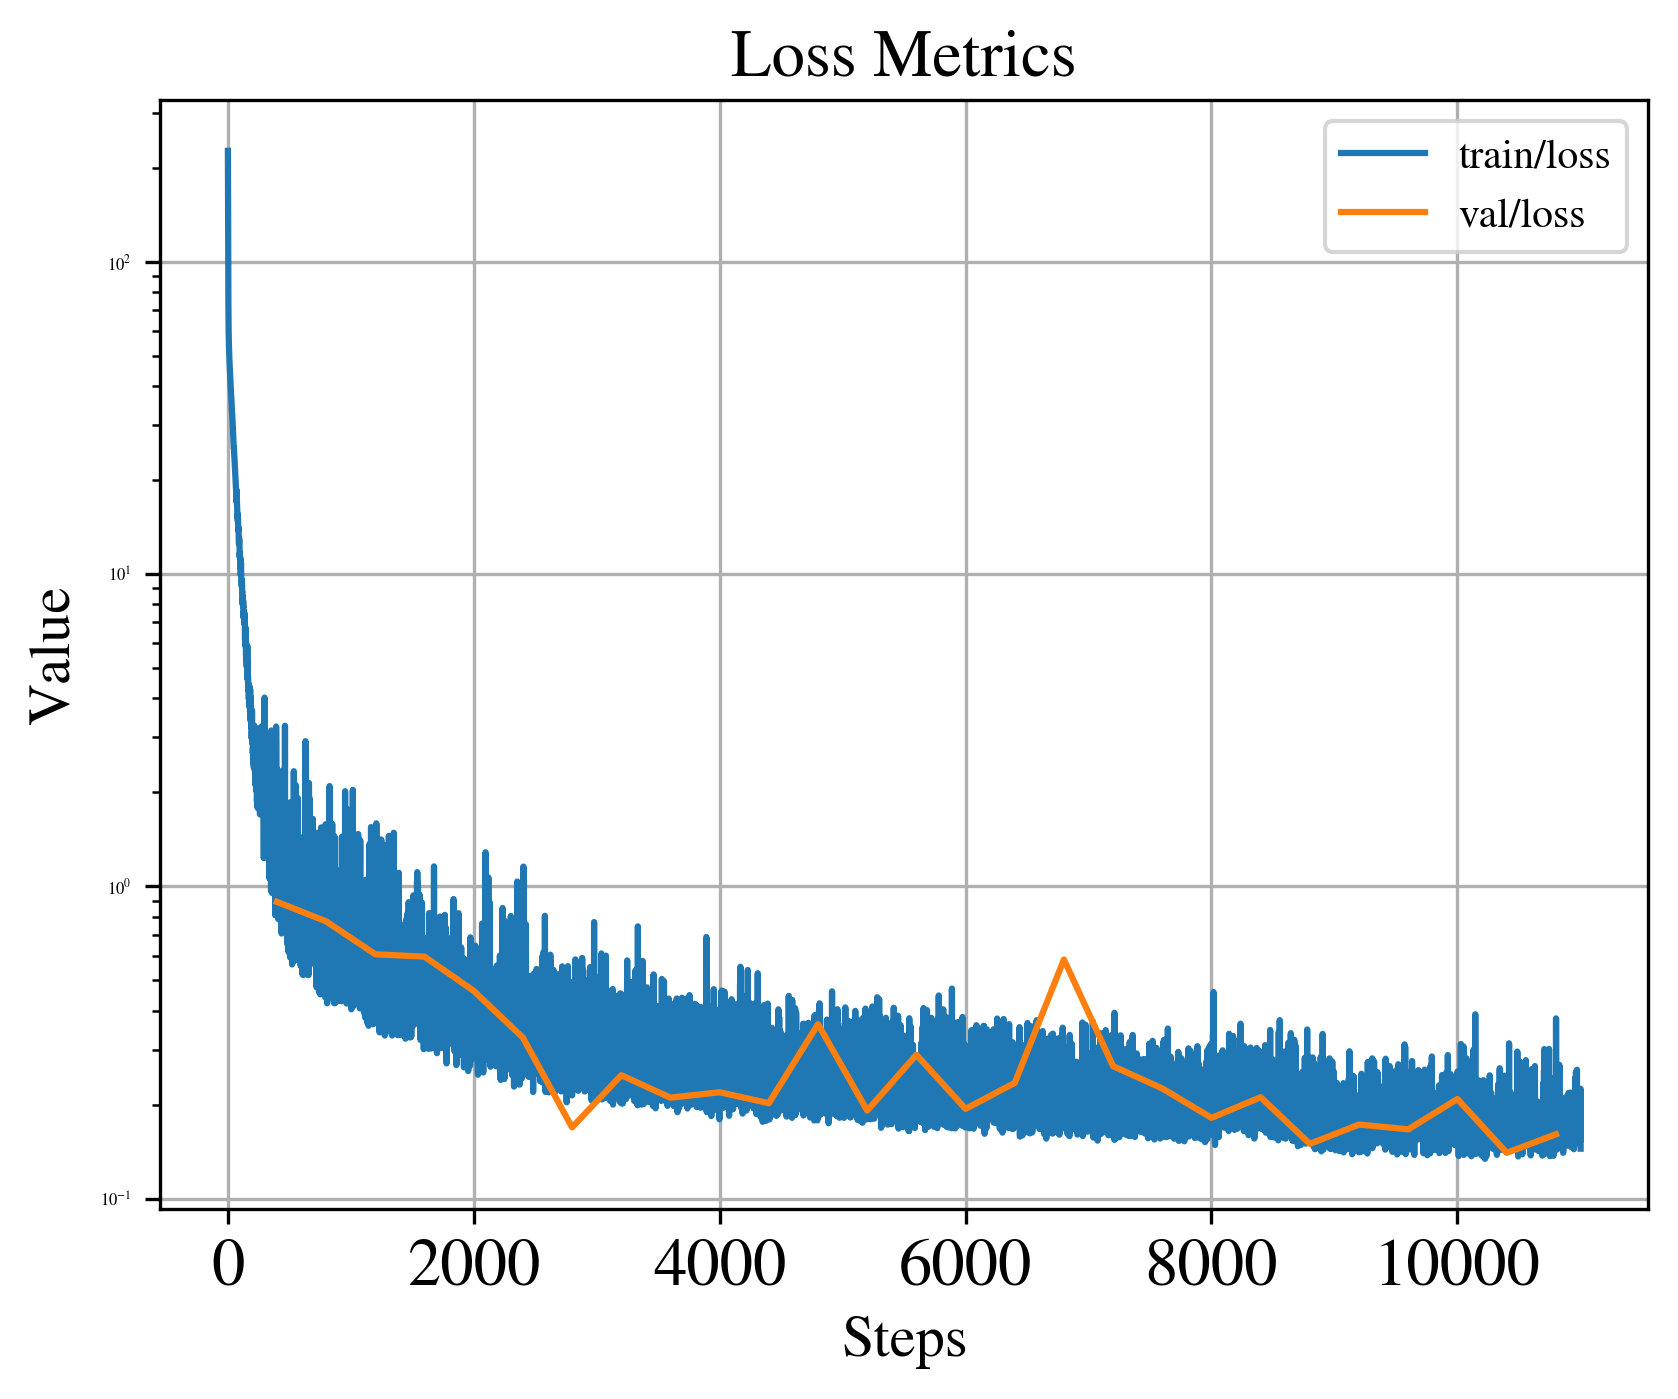

In [15]:
from plot_utils.metrics import RunMetrics # type: ignore -goofy linitng issue
from plot_utils.plot_metrics import plot_metrics # type: ignore -goofy linitng issue


metrics = RunMetrics(model_path)

# Plot a single run
plot_metrics(metrics, metric_names=["train/loss", "val/loss"], title="Loss Metrics")